In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

1.8.0


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data',one_hot = True)

#Utilizamos one_hot, esto nos facilita la manera en que manejamos las etiquetas (nos regresa un vector con 
# tamaño de la dimension de las etiquetas (en este caso 10), con todos los valores en 0, exeptuando 1
# Ejemplo: 
# (Numero 4)
# [0.0.0.0.1.0.0.0.0.0]
# (Numero 9)
# [0.0.0.0.0.0.0.0.0.1]


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
import matplotlib.pyplot as plt
import time

print('There are %s training examples' %mnist.train.images.shape[0])

print('There are %s validation examples' %mnist.validation.images.shape[0])

print('There are %s test examples'  %mnist.test.images.shape[0])

print('Size  of images (as array) %s' %mnist.train.images.shape[1])

print('%s labels' %mnist.train.labels.shape[1])

##10 labels (0,1,2,3,4,5,6,7,8,9)

There are 55000 training examples
There are 5000 validation examples
There are 10000 test examples
Size  of images (as array) 784
10 labels


In [4]:
def muestra_digito(x):
    """
        x: vector 
            784 dimensiones
        Muestra el vector como una imágen de 28x28
    """
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

def vis_img(i, conjunto="train"):
    """
        i indice del conjunto especificado
        conjunto: cadena
            Cualquiera: train, validation, test
            
        Muestra el dígito en el indice i  y su etiqueta
    """
    if(conjunto=="train"): 
        muestra_digito(mnist.train.images[i,])
        label = np.argwhere(mnist.train.labels[i])[0][0]
    elif(conjunto=="test"): 
        muestra_digito(mnist.test.images[i,])
        label = np.argwhere(mnist.test.labels[i])[0][0]
    else:
        muestra_digito(mnist.validation.images[i,])
        label = np.argwhere(mnist.validation.labels[i])[0][0]
    print("Etiqueta " + str(label))
    return

## Red neuronal con 512 neuronas

In [5]:
#
x = tf.placeholder(tf.float32,shape=[None,784]) #Ponemos la dimension del arreglo de las imagenes (784)
y = tf.placeholder(tf.float32,shape=[None,10]) #La dimension de las labels




## creamos las capas de nuestra red neuronal (2 capas, una oculta y otra de salida)


In [9]:
##Capa 1
#Matriz de pesos W_1
W_1 = tf.Variable(tf.truncated_normal(shape = [784,512], stddev=0.2))## [Tamaño de los datos, numero de neuronas de la capa]
#Vector de sesgos b_1
b_1 = tf.Variable(tf.zeros([512]))



#Capa de salida (2)
W_2 =tf.Variable(tf.truncated_normal(shape = [512,10], stddev=0.2)) ##Tomamos el numero de datos que nos va a dar la capa anterior
#en este caso 512 (por las 512 neuronas) y lo pasamos a 10 (nuestra capa de salida solo tiene 10 labels que son los digitos)
##Si quisieramos agregar mas capas podriamos hacerlo
b_2 = tf.Variable(tf.zeros([10]))



In [10]:
def NN(x):
    
    ##Capa escondida 1
    z_1 = tf.matmul(x,W_1) + b_1 #Combinacion lineal
    a_1 = tf.nn.relu(z_1) ##Funcion de activacion
    
   
    z_2 = tf.matmul(a_1,W_2) + b_2 ##Combinacion lineal
  
    
    return z_2

In [11]:
#Funcion de costo
y_ = NN(x)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_,labels = y))


#Predicciones
train_pred = tf.nn.softmax(y_)#Predcciones en el conjunto de entrenamiento

y_valid = NN(mnist.validation.images)
valid_pred = tf.nn.softmax(y_valid) #Predicciones en el conjunto de validacion



In [12]:
#optimizador
opt = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)


In [13]:
#Sesion e inicializacion de variables

sess = tf.Session()#creamos la session
sess.run(tf.global_variables_initializer())

def precision(predictions,labels):
    return (100.0* np.sum(np.argmax(predictions,1)==np.argmax(labels,1))/predictions.shape[0])

In [14]:
##Entrenamiento



steps = 5000

print('Training ')
for i in range(steps):
    batch = mnist.train.next_batch(100)
    _,cost, predictions = sess.run([opt,cross_entropy,train_pred], feed_dict={x: batch[0],y: batch[1]})
    
    if(i% 500 ==0):
        print('Costo del batch hasta el paso %s es %f' %(i,cost))
        print('Precision del conjunto de entrenamiento: %.1f%%' %precision(predictions,batch[1]))
        print('Precision del conjundo de validacion: %.1f%%' %precision(valid_pred.eval(session=sess),mnist.validation.labels))
        print('\n')

    

Training 
Costo del batch hasta el paso 0 es 8.695303
Precision del conjunto de entrenamiento: 11.0%
Precision del conjundo de validacion: 26.1%


Costo del batch hasta el paso 500 es 0.097808
Precision del conjunto de entrenamiento: 97.0%
Precision del conjundo de validacion: 96.0%


Costo del batch hasta el paso 1000 es 0.209466
Precision del conjunto de entrenamiento: 94.0%
Precision del conjundo de validacion: 96.8%


Costo del batch hasta el paso 1500 es 0.047680
Precision del conjunto de entrenamiento: 98.0%
Precision del conjundo de validacion: 97.3%


Costo del batch hasta el paso 2000 es 0.054323
Precision del conjunto de entrenamiento: 99.0%
Precision del conjundo de validacion: 97.3%


Costo del batch hasta el paso 2500 es 0.021931
Precision del conjunto de entrenamiento: 99.0%
Precision del conjundo de validacion: 97.6%


Costo del batch hasta el paso 3000 es 0.017982
Precision del conjunto de entrenamiento: 100.0%
Precision del conjundo de validacion: 97.8%


Costo del bat

In [15]:
y_test = NN(mnist.test.images)
test_predictions = tf.nn.softmax(y_test)

print('Precision del conjunto de prueba: %.1f%%' % precision(test_predictions.eval(session=sess),mnist.test.labels)) 

Precision del conjunto de prueba: 97.9%


prediction =  6


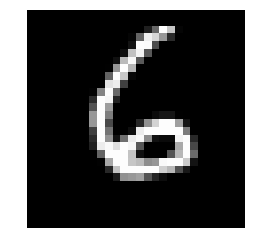

Etiqueta 6


In [16]:

index = 600
p = tf.argmax(NN(mnist.test.images[index:index+1]).eval(session = sess),1)
print('prediction =  %s' %sess.run(p)[0])

vis_img(index,conjunto='test')

In [17]:
def remove_transparency(im, bg_colour=(255, 255, 255)):

    # Only process if image has transparency 
    if im.mode in ('RGBA', 'LA') or (im.mode == 'P' and 'transparency' in im.info):

        # Need to convert to RGBA if LA format due to a bug in PIL 
        alpha = im.convert('RGBA').split()[-1]

        # Create a new background image of our matt color.
        # Must be RGBA because paste requires both images have the same format

        bg = Image.new("RGBA", im.size, bg_colour + (255,))
        bg.paste(im, mask=alpha)
        return bg

    else:
        return im

In [34]:
from PIL import Image, ImageOps
imagen = "./2hand.png"
img = Image.open(imagen)
img = remove_transparency(img).convert('L')
img = ImageOps.invert(img)
if  img.size != (28,28):
    img.thumbnail((28,28), Image.ANTIALIAS)

entrada = np.array(img, dtype = np.float32)
entrada = entrada.reshape((1,784))
entrada = entrada/255.0
        
p = tf.argmax(NN(entrada).eval(session = sess),1)
print("Imágen:{}".format(imagen))
img.show()
print("Predicción:", sess.run(p)[0])

Imágen:./2hand.png
Predicción: 2
